In [1]:
from keras.datasets import mnist


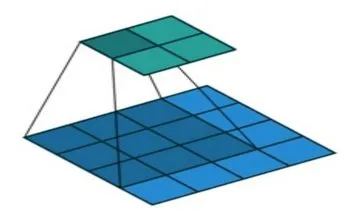

## Step 1: Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 [==============================] - 40s 3us/step


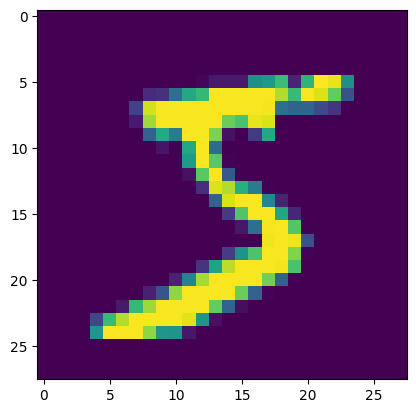

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])


In [4]:
X_train[0].shape


(28, 28)

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [5]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)


In [6]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building our model

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [11]:
# create our model 
model = Sequential() 

# add more layers 
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


## Compiling our model

In [13]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Training our model

In [14]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)


Epoch 1/3


1875/1875 [==============================] - 34s 18ms/step - loss: 0.2351 - accuracy: 0.9494 - val_loss: 0.0818 - val_accuracy: 0.9758
Epoch 2/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0786 - val_accuracy: 0.9759
Epoch 3/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0824 - val_accuracy: 0.9796


model.predict(X_test[:4])


In [16]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Building our first project using CNN

### What is CNN ? 
- cnn helps in image recognition from the dataset mainly. 


### How CNN works ? 
- the process of obtaining the multiple images from single image is called as convolution.
- the process of reducing the size of that image is called as the pooling.
- we created multiple images from the single image with different filters.
- we will convert these images into the single row means into the single vectors and we can use neural network.
- we will train our model based on that.
- in this CNN works


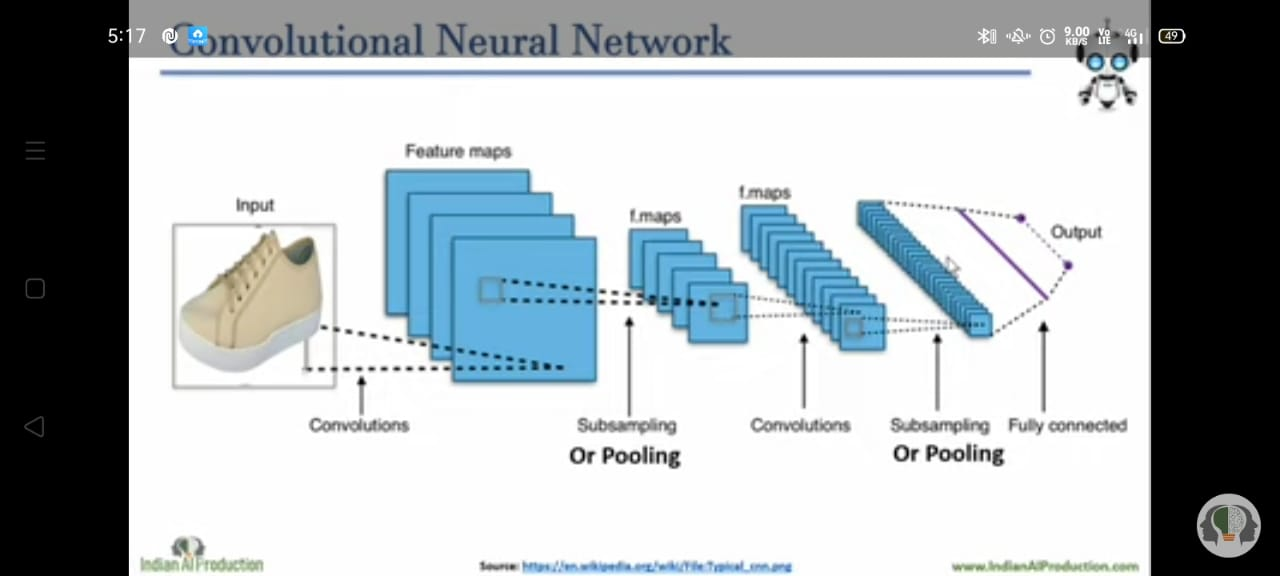


### Project Arcitecture - Fashion Classification

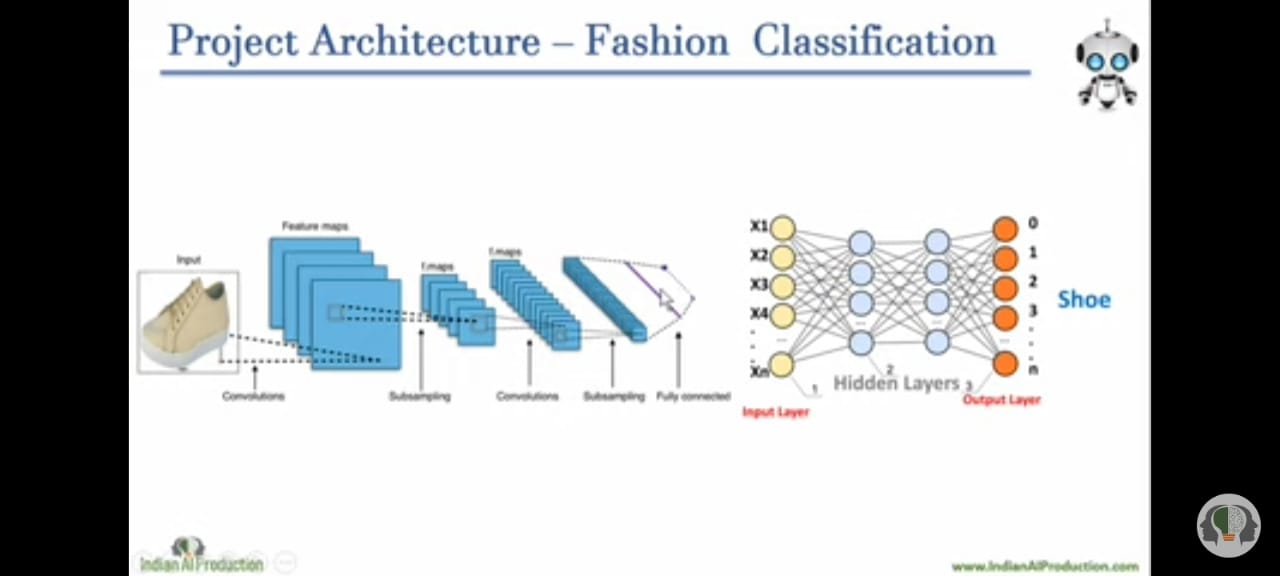

#### The neurons in the neural network will depend on the dataset. in the output layer we will have the classes as shown in the above figure. 
#### The neuron with the greater probability will be consider as the best match. 
#### we create multiple images of the single images with the help of the filter  
#### the filter can be such as the bluring filter, the gaussian gray filter. 

# Building the convolutional neural network

# Project Fashion - Classification - End to End 
Train the convolutional neural network 60,000 fashion minist images (data in Np array) 

test the convolutional neural network on 10,000 fashion minist images (data in np array)

### Import Libraries

In [23]:
import numpy as np 
import matplotlib.pyplot as plt # for showing images
import seaborn as sns # for showing images
import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


print('imported library succesfully')

imported library succesfully


## Load Data

In [25]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 26s 6us/step


In [27]:
X_train.shape,y_train.shape
# 28 rows 
# 28 columns 
# 60,000 lables

((60000, 28, 28), (60000,))

In [28]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [29]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [30]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [31]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [34]:
# 0 is white pixel and 255 is black
X_train[0]  # The information of single images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [35]:
y_train[0]

9

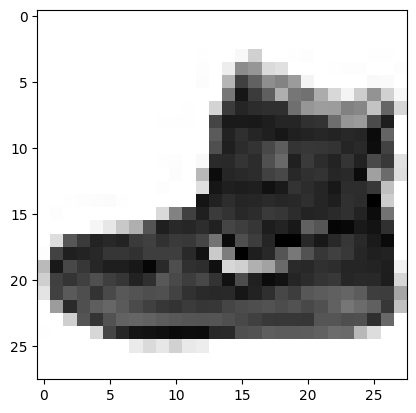

In [42]:
plt.imshow(X_train[0],cmap='Greys')

In [46]:
y_test[1] 
class_labels = ['T-shirt/top','Trowser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Anklel boot' ]


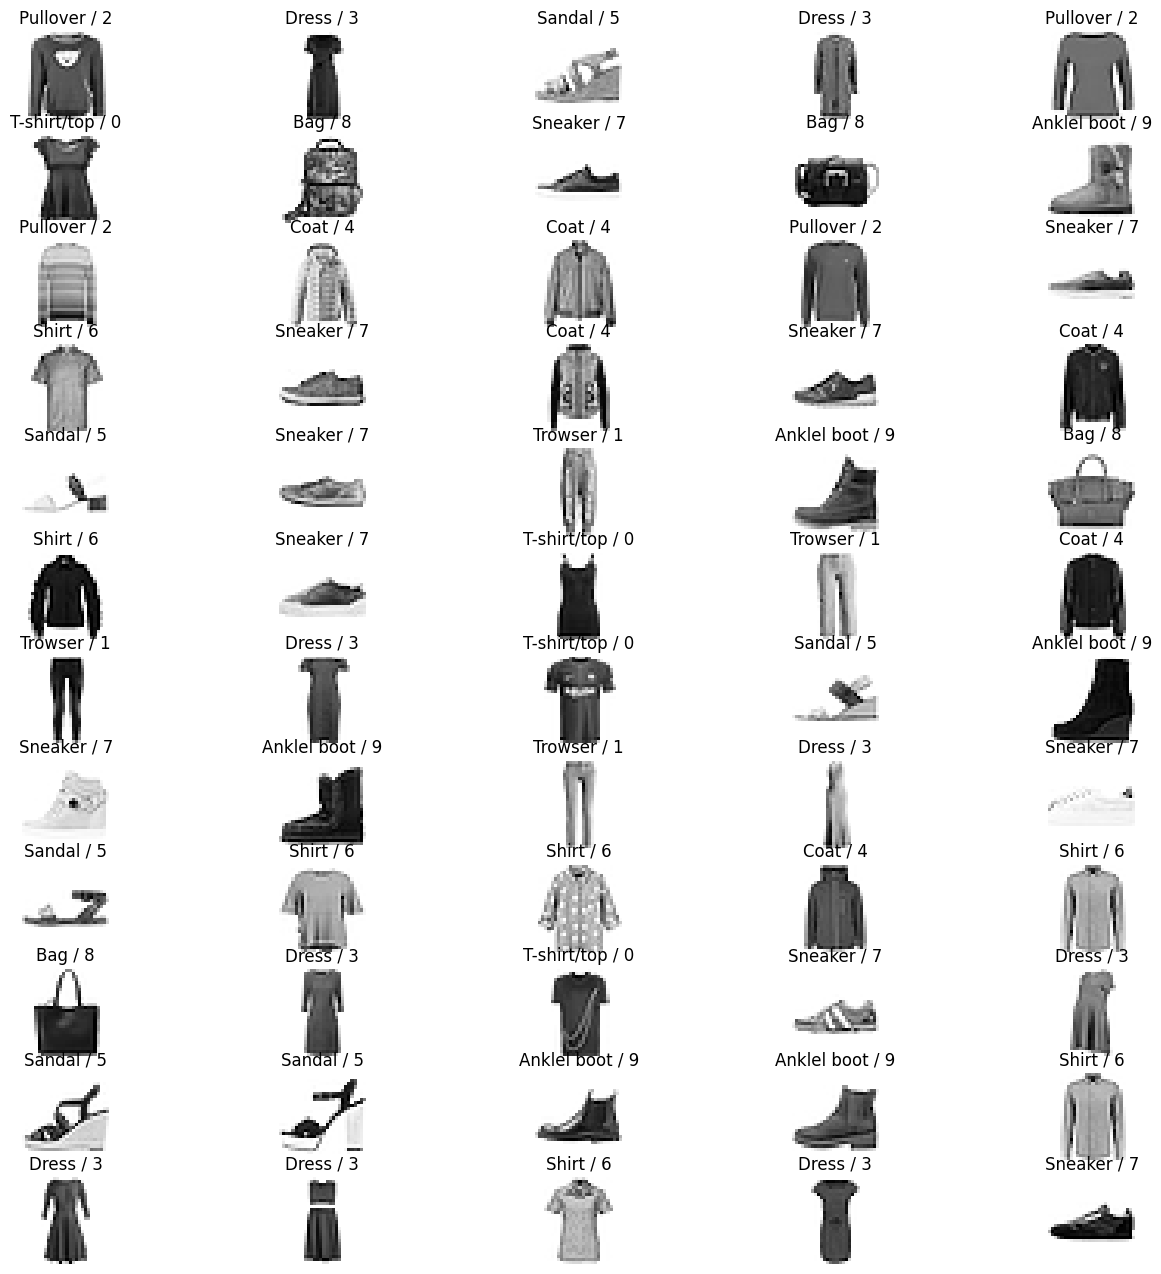

In [54]:
plt.figure(figsize=(16,16))

j = 1
for i in np.random.randint(0,1000,60): 
    plt.subplot(12,5,j); # it donates the rows and columns required for the 60 images
    j += 1 
    plt.imshow(X_train[i],cmap="Greys") 
    plt.axis('off') # off the axis 
    plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i])) # plot and number show karenge
    # randomly number liya

#### change dimensions

In [56]:
X_train.ndim
X_train.shape 
X_test.shape

(10000, 28, 28)

In [57]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_train,-1)


In [59]:
X_train.ndim # it becomes 4 dimensional 

4

### Featuring Scaling


In [60]:
X_train = X_train/255 
X_test = X_test/255 



In [61]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# Split dataset

In [66]:
import sklearn
from sklearn.model_selection import train_test_split 
X_train , X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [67]:
X_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [68]:
X_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

# CNN Model Building